Tobigs 16기 김윤혜

# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

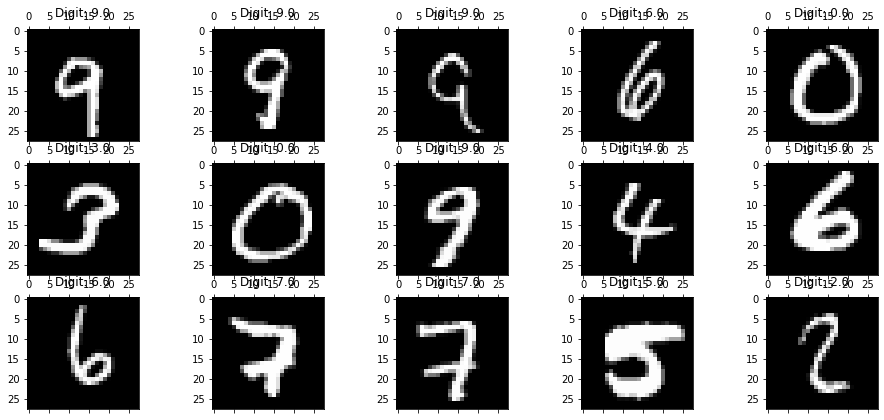

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56000, 784) (14000, 784) (56000, 1) (14000, 1)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

### PCA

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
pca.fit(X_train)
cum_var_pca = np.cumsum(pca.explained_variance_ratio_)
len(cum_var_pca)

784

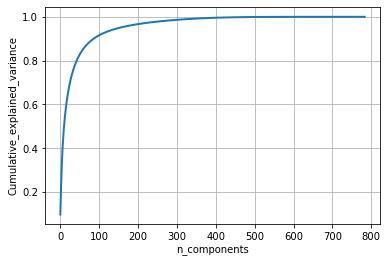

In [12]:
plt.plot(cum_var_pca, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [13]:
# 누적설명률 0.9 주성분 개수
np.argmax(cum_var_pca>0.9)+1

87

In [14]:
# 누적설명률 0.8 주성분 개수
np.argmax(cum_var_pca>0.8)+1

43

In [15]:
# 43개로 차원 축소
pca_43 = PCA(n_components=43)
X_train_43 = pca_43.fit_transform(X_train)
X_test_43 = pca_43.transform(X_test)

### LDA

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
cum_var_lda = np.cumsum(lda.explained_variance_ratio_)
len(cum_var_lda)

C:\Users\com\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


9

In [18]:
X_train_9 = lda.fit_transform(X_train, y_train)
X_test_9 = lda.transform(X_test)

C:\Users\com\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [19]:
# 누적설명률 0.9
np.argmax(cum_var_lda>0.9)+1

7

In [20]:
# 누적설명률 0.8
np.argmax(cum_var_lda>0.8)+1

5

In [21]:
# 5개로 차원 축소
lda_5 = LinearDiscriminantAnalysis(n_components=5)
X_train_5 = lda_5.fit_transform(X_train, y_train)
X_test_5 = lda_5.transform(X_test)

C:\Users\com\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

특정한 틀 없이 자유롭게 해주시면 됩니다!

### 1. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

* 축소 X

In [23]:
rf = RandomForestClassifier(n_estimators=100)
t1 = time.time()
rf.fit(X_train, y_train)
t2 = time.time()

pred_784 = rf.predict(X_test)
acc_784 = accuracy_score(y_test, pred_784)

<ipython-input-23-946650cc9ded>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [24]:
print('Accuracy: %.3f' %acc_784)
print('training 시간: 약 %d초' %(t2 - t1))

Accuracy: 0.968
training 시간: 약 39초


* PCA 축소: 43개

In [36]:
t1 = time.time()
rf.fit(X_train_43, y_train)
t2 = time.time()

pred_43 = rf.predict(X_test_43)
acc_43 = accuracy_score(y_test, pred_43)

<ipython-input-36-4e21ea35a324>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_43, y_train)


In [37]:
print('Accuracy: %.3f' %acc_43)
print('training 시간: 약 %d초' %(t2 - t1))

Accuracy: 0.953
training 시간: 약 39초


* LDA 축소: 9개

In [38]:
t1 = time.time()
rf.fit(X_train_9, y_train)
t2 = time.time()

pred_9 = rf.predict(X_test_9)
acc_9 = accuracy_score(y_test, pred_9)

<ipython-input-38-5960d202be42>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_9, y_train)


In [39]:
print('Accuracy: %.3f' %acc_9)
print('training 시간: 약 %d초' %(t2 - t1))

Accuracy: 0.917
training 시간: 약 20초


* LDA 축소: 5개

In [40]:
t1 = time.time()
rf.fit(X_train_5, y_train)
t2 = time.time()

pred_5 = rf.predict(X_test_5)
acc_5 = accuracy_score(y_test, pred_5)

<ipython-input-40-038672e7a645>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_5, y_train)


In [41]:
print('Accuracy: %.3f' %acc_5)
print('training 시간: 약 %d초' %(t2 - t1))

Accuracy: 0.848
training 시간: 약 13초


### 2. SVM

In [26]:
from sklearn.svm import SVC

* 축소 X

In [27]:
svm = SVC()
t1 = time.time()
svm.fit(X_train, y_train)
t2 = time.time()

svm_pred_784 = svm.predict(X_test)
svm_pred_784 = accuracy_score(y_test, svm_pred_784)

C:\Users\com\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
print('Accuracy: %.3f' %svm_pred_784)
print('training 시간: 약 %d초' %(t2 - t1))

Accuracy: 0.979
training 시간: 약 259초


* PCA 축소: 43개

In [29]:
t1 = time.time()
svm.fit(X_train_43, y_train)
t2 = time.time()

svm_pred_43 = svm.predict(X_test_43)
svm_pred_43 = accuracy_score(y_test, svm_pred_43)

C:\Users\com\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [30]:
print('Accuracy: %.3f' %svm_pred_43)
print('training 시간: 약 %d초' %(t2 - t1))

Accuracy: 0.983
training 시간: 약 29초


* LDA 축소: 9개

In [31]:
t1 = time.time()
svm.fit(X_train_9, y_train)
t2 = time.time()

svm_pred_9 = svm.predict(X_test_9)
svm_pred_9 = accuracy_score(y_test, svm_pred_9)

C:\Users\com\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
print('Accuracy: %.3f' %svm_pred_9)
print('training 시간: 약 %d초' %(t2 - t1))

Accuracy: 0.917
training 시간: 약 11초


* LDA 축소: 5개

In [34]:
t1 = time.time()
svm.fit(X_train_5, y_train)
t2 = time.time()

svm_pred_5 = svm.predict(X_test_5)
svm_pred_5 = accuracy_score(y_test, svm_pred_5)

C:\Users\com\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
print('Accuracy: %.3f' %svm_pred_5)
print('training 시간: 약 %d초' %(t2 - t1))

Accuracy: 0.852
training 시간: 약 14초


dimension이 작아질수록 학습 속도가 빨라지는 것을 확인하였다. <br>
Support Vector Machine, 43개 차원 축소한 모델이 정확도 0.983으로 가장 성능이 높았다.